In [1]:
%matplotlib widget

import matplotlib.pyplot

import math

In [2]:
frequencies = []

with open("x_axis.txt", "r") as frequencies_file:
    for line in frequencies_file:
        line = line.strip()
        if line == "":
            continue
        for frequency in line.split(","):
            frequency = float(frequency)
            frequencies.append(frequency)

In [3]:
frequency_idx = -27
print(frequencies[frequency_idx])

3915013000.0


In [4]:
import numpy

x_count = 98
y_count = 120

x_angles = numpy.zeros([x_count, y_count], dtype=float)
y_angles = numpy.zeros([x_count, y_count], dtype=float)
data_vertical = numpy.zeros([x_count, y_count], dtype=complex)
data_horizontal = numpy.zeros([x_count, y_count], dtype=complex)

i = 0
j = 0

with open("ryan_vertical.csv", "r") as data_file:
    for line in data_file:
        line = line.strip()
        if line == "":
            continue

        x, y, others = line.split(",", 2)
        x = float(x)
        if x < 180:
            x /= 0.8
        else:
            x -= 360
            x /= 0.8
        x_angles[i,j] = math.radians(x)

        y = float(y)
        y_angles[i,j] = math.radians(y)

        others = others.split(",")
        this_data = float(others[2*frequency_idx]) + 1j*float(others[2*frequency_idx+1])
        data_vertical[i,j] = this_data
        
        i += 1
        if  i >= x_count:
            i = 0
            j += 1
            if j >= y_count:
                break

i = 0
j = 0
                
###############
#!!!!!!!!!!!!!!
# Angles should be similar between runs, but ignoring the small differences for this
#!!!!!!!!!!!!!!
###############
with open("ryan_horizontal.csv", "r") as data_file:
    for line in data_file:
        line = line.strip()
        if line == "":
            continue

        x, y, others = line.split(",", 2)
        others = others.split(",")
        this_data = float(others[2*frequency_idx]) + 1j*float(others[2*frequency_idx+1])
        data_horizontal[i,j] = this_data
        
        i += 1
        if  i >= x_count:
            i = 0
            j += 1
            if j >= y_count:
                break

In [5]:
plot_data = 20*numpy.log10(numpy.abs(numpy.abs(data_vertical)+1j*numpy.abs(data_horizontal)))
#plot_data = 20*numpy.log10(numpy.abs(data_vertical))

In [6]:
from math import cos, sin
import numpy

def plot_antenna(ax, r, theta, phi, theta_offset=0, r_range=30):
    """
    ax needs to have been created with projection='3d'
    theta, phi in radians - these are "not quite" spherical, see calculation
    """
    ax.grid(False)
    ax.axis('off')
    
    color_norm = matplotlib.colors.Normalize(vmin=0, vmax=r_range, clip=True)
    
    r_max = numpy.max(r)
    r = r - r_max + r_range
    r = numpy.maximum(r, 0*r)
    
    print(r_max)
    
    ax.plot([0, 1.5*r_range], [0, 0], [0, 0], color='red')
    ax.plot([0, 0], [0, 1.5*r_range], [0, 0], color='green')
    ax.plot([0, 0], [0, 0], [0, 1.5*r_range], color='blue')
    
    x = r*numpy.cos(theta)
    y = r*numpy.sin(theta)
    z = r*-0.2 # probe antenna is depressed about 0.5m and about 2.5m from AUT
    
    x_ = x
    y_ = y*numpy.cos(phi) - z*numpy.sin(phi)
    z_ = y*numpy.sin(phi) + z*numpy.cos(phi)
    
    x = x_
    y = y_
    z = z_
    
    x_ = x*numpy.cos(theta_offset) + y*numpy.sin(theta_offset)
    y_ = y*numpy.cos(theta_offset) - x*numpy.sin(theta_offset)
    
    x = x_
    y = y_
    
    # This should really be done by interpolation instead as this is face colors, not vertex colors
    vertex_colors = matplotlib.cm.jet(color_norm(r))
    
    ax.plot_surface(x, y, z, linewidth=0, facecolors=vertex_colors, antialiased=True)

    return color_norm, matplotlib.cm.jet

-46.075626764368174


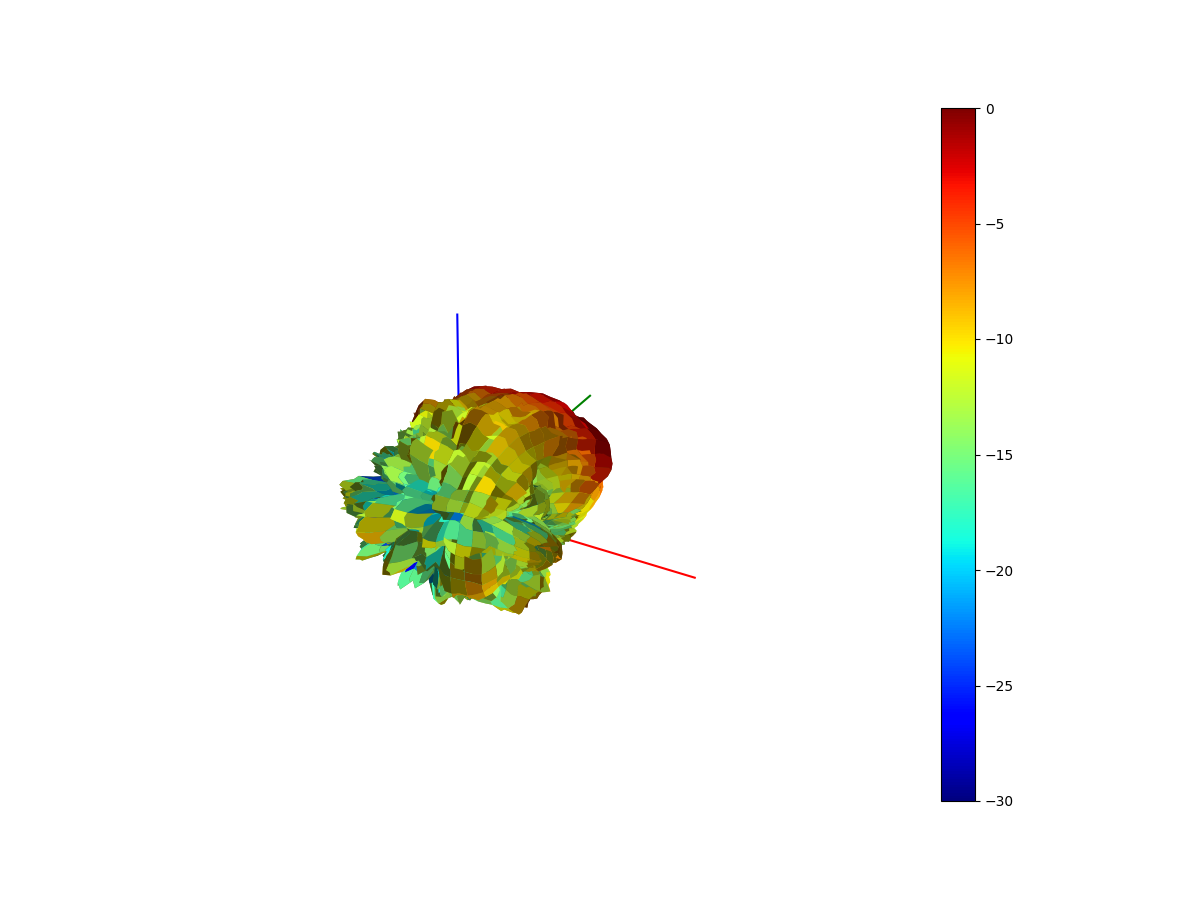

In [7]:
from math import pi


a = slice(None)
b = slice(0, y_count // 2)

a = slice(None)
b = slice(None)

r = plot_data[a,b]
theta = x_angles[a,b]
phi = y_angles[a,b]

#r = plot_data
#theta = x_angles
#phi = y_angles

fig, ax = matplotlib.pyplot.subplots(figsize=(12,9), 
                                     subplot_kw={'projection':'3d'})
color_norm, cmap = plot_antenna(ax, r, theta, phi, theta_offset=math.radians(0))

color_norm = matplotlib.colors.Normalize(vmin=color_norm.vmin-color_norm.vmax, vmax=0)
fig.colorbar(matplotlib.cm.ScalarMappable(norm=color_norm, cmap=cmap), ax=ax)